In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

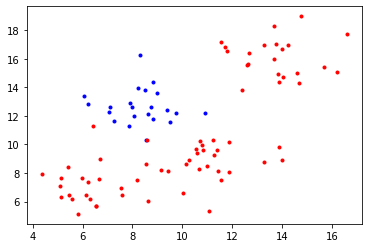

In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP4.npy",allow_pickle=True) 
#Pixel peau 
T_train = X_train[np.where(y_train==1),:] 
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 
#Pixel non peau 
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show;

In [ ]:
X_train.shape
X_test.shape
F_train.shape

(22, 2)

In [ ]:
def norm2(x, m, cov): 
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov)) 
  a = np.dot(a, (x-m)) 
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a) 
  return p

In [ ]:
def ddp_parzen(x,X,Cov):
  S=0
  for i in range (len(X)): 
    S += norm2(x, X[i], Cov)
  return S/len(X)
  #le principe est placer des gaussiennes autour de chaque point et sommer leurs contributions 
  #le noyau K ( la densité d'une loi gaussien) ;

In [ ]:
 COV= [[10, 0],[ 0, 10]]
 
 P_Chair= np.zeros([20,20])
 P_non_Chair = np.zeros([20,20])
for Cb in range(1, 21):
  for Cr in range(1, 21):
    P_Chair [Cr-1 , Cb-1]=ddp_parzen([Cb,Cr], T_train ,COV)
    P_non_Chair [Cr-1 , Cb-1]=ddp_parzen([Cb,Cr], F_train, COV)



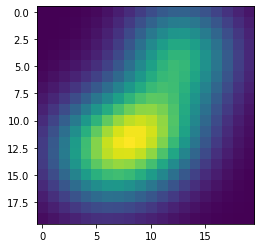

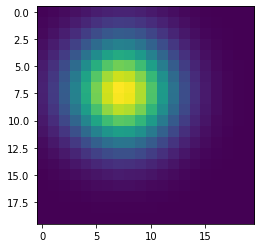

In [ ]:
plt.imshow(np.flipud(P_Chair))
plt.figure()
plt.imshow(np.flipud(P_non_Chair))

In [ ]:
# _la disperssion de ddp depend de l'ecart type ,quand l'ecart type augmente la ddp devient plus dispersé .
#_ oui  Etait-ce prévisible 

# ON CHOISI la valeur de l'ecart type pour ql soit la plus grande possible mais que la ddp non chaire soit independante 
# par rapport la ddp chaire 

## III. Classification bayésienne

In [ ]:
pC= len(T_train)/len(X_train) ##P(Chair)
pNC= len(F_train)/len(X_train) ##P(Non Chair)



In [ ]:
# priori p(chair/x)
#posteriori p(x/chaire)

In [ ]:
p_chair_x=P_Chair*pC/(P_Chair*pC+P_non_Chair* pNC)
p_non_chair_x=P_non_Chair* pNC/(P_Chair*pC+P_non_Chair* pNC)

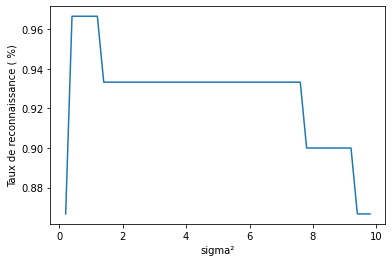

In [ ]:
sig2=np.arange(0.2,10,0.2)
A=[]
for s in (sig2):

  COV=[[s, 0],[ 0, s]]
  y=[]
  Acc=0
  for i in range( len(X_test)):
    if ddp_parzen(X_test[i], T_train, COV)*pC > ddp_parzen(X_test[i], F_train, COV)*pNC :
      if y_test[i]==1  :
        Acc +=1
    else:
      if y_test[i]==0  :
        Acc +=1

  Acc /= len(X_test)
  A.append(Acc)
plt.plot(sig2,A)
plt.xlabel('sigma²')
plt.ylabel('Taux de reconnaissance ( %)');

In [ ]:
# oui etait prévisible 
# explique le resultat : 